# **Parte I do Treinamento**
## Criando alunos(as) com JSON

### Criando os nomes dos Alunos

In [116]:
# Importando a biblioteca
import pandas as pd

In [117]:
# Usaremos os nomes mais utilizados, consultando o site do IBGE
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

# Nesse caso estamos utilizando arquivos do tipo Json

In [118]:
print('Quantidade de nomes: ', str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes:  400


In [119]:
# Vamos criar uma lista com as duas variáveis de nome
frames = [nomes_f, nomes_m]
type(frames)

list

In [120]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [121]:
# Agora vamos criar um DataFrame com essa lista
nomes = pd.concat(frames)['nome'].to_frame()

# Usamos o sample para mostrar alguns nomes aleatoriamente
nomes.sample(5)

,nome
137,NAIR
199,GEOVANE
54,REGINA
63,MIGUEL
147,LILIAN


### Incluindo ID dos alunos

In [122]:
# Importando a biblioteca
import numpy as np
np.random.seed(123)

In [123]:
# Atribuindo o total de alunos a uma variável
total_alunos = len(nomes)
total_alunos

400

In [124]:
# Gerando aleatoriamente o id dos alunos
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [125]:
# Retornando alguns alunos aleatoriamente
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [126]:
# Criando domínios de e-mail para os alunos
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [127]:
# Retornando alguns alunos aleatoriamente
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [128]:
# Criando o campo e-mail usando nome + domínio
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [129]:
# Retornando alguns alunos aleatoriamente
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# **Parte II do Treinamento**
## Criando cursos lendo HTML

### Criando a tabela cursos

In [130]:
# Instalando bibliotecas externas
!pip3 install html5lib
!pip3 install lxml

In [131]:
# Importando as biblioteca para uso
import html5lib

In [132]:
# Acessando e lendo o HTML através da URL
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [133]:
# Mostrando o tipo do objeto
type(cursos)

list

In [134]:
# Atribuindo a coluna 0 a uma variável, tornando um DataFrame
cursos = cursos[0]
type(cursos)

pandas.core.frame.DataFrame

In [135]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


### Alterando o index dos cursos

In [136]:
# Renomeando colunas
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [137]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [138]:
# Criando uma coluna id em ordem
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [139]:
# Setando a coluna id como index
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


### Matriculando os alunos nos cursos

In [140]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [141]:
# Gerando o número das matrículas de forma aleatória usando o total de alunos
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,1
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,2
117,PAMELA,189,@dominiodoemail.com.br,pamela@dominiodoemail.com.br,1


In [142]:
# Estatísticas gerais
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [143]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


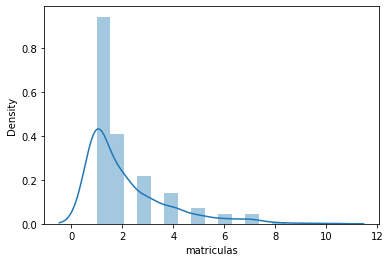

In [144]:
sns.distplot(nomes.matriculas)

In [145]:
# Quantidade de alunos inscritos em 1 ou mais cursos
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
10      1
9       1
Name: matriculas, dtype: int64

### Selecionando os cursos

In [146]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,1
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,2


In [147]:
# Criando as variáveis que usaremos no loop
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [148]:
# Criando um loop para definir aleatoriamente os cursos em que cada aluno está inscrito
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [149]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12


In [150]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


#### DataFrames que temos até agora...

In [151]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,2
90,ANDRESSA,213,@servicodoemail.com,andressa@servicodoemail.com,1
191,ERICK,124,@dominiodoemail.com.br,erick@dominiodoemail.com.br,1


In [152]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [153]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12


In [154]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [155]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python


# **Parte III do Treinamento**
## Escrevendo CSV, JSON e HTML

### Saída em diferentes formatos

In [156]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web


In [157]:
# Salvando o DataFrame em formato csv
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [158]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,59,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,75,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java
9,40,Código limpo com C#


In [159]:
# Salvando o DataFrame em formato JSON
matriculas_json = matriculas_por_curso.to_json()

In [160]:
matriculas_json

'{"quantidade_de_alunos":{"1":59,"2":31,"3":53,"4":4,"5":12,"6":75,"7":32,"8":18,"9":59,"10":40,"11":61,"12":66,"13":14,"14":27,"15":46,"16":43,"17":56,"18":53,"19":75,"20":35},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [161]:
# Salvando o DataFrame em formato HMTL
matriculas_html = matriculas_por_curso.to_html()

In [162]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>59</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>75</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>59</td>
 

# **Parte IV do Treinamento**
## Lendo e escrevendo SQL


> O SQL Lite vem disponível juntamente com o Pandas quando realizamos a instalação e o import dessa biblioteca, sendo necessário somente a instalação do pacote referente a manipulação com a linguagem SQL. Por esse motivo se torna mais fácil e simples a criação e consulta nesse banco de dados.



### Criando o banco SQL

In [163]:
# Instalando a biblioteca de manipulação SQL
!pip install sqlalchemy

In [164]:
from sqlalchemy import create_engine, MetaData, Table

In [165]:
'''
Criando o banco de dados SQLite com o parâmetro memory fazemos ele ser 
salvo em memória local
'''
engine = create_engine('sqlite:///:memory:')

In [166]:
engine

Engine(sqlite:///:memory:)

In [167]:
type(engine)

sqlalchemy.engine.base.Engine

In [168]:
# Transformando um DataFrame em SQL
# Parâmetros - 1 é o nome da tabela e o 2 é o engine criado
matriculas_por_curso.to_sql('matriculas', engine)

In [169]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


### Buscando no banco de dados

In [170]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [171]:
# Realizando um select no banco de dados usando a função query() do Pandas
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,5,12,Cursos de Python
2,8,18,Novas integrações com Java
3,13,14,Persistência com .NET


In [172]:
# Lendo uma tabela inteira
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,59
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,75
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,40


In [173]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [174]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,75
18,Boas práticas em Java,75


### Insert no banco de dados

In [175]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [176]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# **Parte V do Treinamento**
## Lendo e escrevendo Excel

### Nomes dos alunos(as) da próxima turma

In [177]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [178]:
id_curso = 5
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
20,174,5
79,103,5
175,329,5
207,367,5
300,387,5
309,54,5
348,247,5
496,309,5
578,395,5
586,170,5


In [179]:
# Juntando dados de 2 DataFrames usando a função join do Pandas
# Isso cria uma lista
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
174       SANDRA
103       JOSEFA
329       MONICA
367        CELIA
387     ROSILENE
54     MARGARIDA
247       RAIANE
309       MATEUS
395     MAURICIO
170    REGINALDO
271       NILTON
74        MARLON
Name: nome, dtype: object

In [184]:
# Transformando a lista anterior em um DataFrame
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [185]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Cursos de Python
Name: 5, dtype: object

In [186]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Cursos de Python'

In [189]:
# Renomear coluna para mostrar os alunos do curso definido
proxima_turma = proxima_turma.rename(columns={'nome':'Alunos do curso {}'.format(nome_curso)})

In [191]:
proxima_turma.sample(5)

,Alunos do curso Cursos de Python
id_aluno,
54,MARGARIDA
74,MARLON
367,CELIA
387,ROSILENE
103,JOSEFA


### Gerando arquivo Excel

In [192]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [193]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso Cursos de Python
0,SANDRA
1,JOSEFA
2,MONICA
3,CELIA
4,ROSILENE
5,MARGARIDA
6,RAIANE
7,MATEUS
8,MAURICIO
9,REGINALDO
